Clique [aqui](https://www.exchangerate-api.com/docs/free-exchange-rate-api) para acessar a documentação da Exchange Rate API.

## Application Programming Interface
Hoje em dia é muito comum que diferentes aplicações consumam dados pela internet, muitas vezes dados providenciados por terceiros. Por exemplo, um aplicativo de entrega de alimentos pode usar dados de geolocalização do Google para localizar restaurantes próximos ao usuário e exibir a rota percorrida pelo entregador.

Como as aplicações podem rodar em diferentes plataformas (Windows, Android, MacOS, iOS, um navegador de internet...), é importante estabelecer uma linguagem comum para que todos consigam consumir esses dados.

Essa "linguagem comum" é o que chamamos de API: Application Programming Interface. A organização que disponibiliza os dados estabelece algumas "regrinhas" para fazermos requisições, e em contrapartida ela garante que os recursos fornecidos também seguirão certos padrões, facilitando a vida dos programadores.

Portanto, quando decidimos utilizar uma API, a primeira coisa que precisamos fazer é estudar sua documentação. Vejamos alguns dos pontos mais relevantes para procurar.

Todos os exemplos de requisição que mostraremos aqui podem ser colados em seu navegador ou estudados usando um requests.get no Python e imprimindo seu campo text.

## URI base
Várias APIs fornecem um "endereço base". Todas as suas requisições incluirão esse endereço, e ao final dele nós colocamos detalhes específicos para cada um dos recursos disponíveis.

Por exemplo, na AlphaVantage (https://www.alphavantage.co/), uma API de dados de bolsas de valores e criptomoedas, a URI base é:

https://www.alphavantage.co/query?

Após a interrogação nós colocaremos os campos para nossa consulta. Por exemplo, para fazer uma consulta sem autenticação para valores da IBM, de 5 em 5 minutos, o endereço completo fica:

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo

Note o formato com &NomeDoCampo=ValorDoCampo. Ele é bastante comum. Outro formato bastante comum é o de "subdiretórios".

Um exemplo é a PokéAPI. A URI base é:

https://pokeapi.co/api/v2/

Para procurar por pokémons, adicionamos pokemon/. Em seguida, podemos colocar números (índices) ou nomes de Pokémon, como:

https://pokeapi.co/api/v2/pokemon/ditto/

https://pokeapi.co/api/v2/pokemon/25

Se ao invés de pokémons estivéssemos interessados em tipos de pokémon, usaríamos types/ e o nome ou índice do tipo desejado:

https://pokeapi.co/api/v2/type/ghost

### Formato

### Tipo de dado
Algumas APIs possuem formatos fixos de dados. Outros permitem que você escolha. É comum, por exemplo, que uma API permita que você escolha entre JSON, XML, CSV e/ou outros formatos.

Caso você tenha entrado no AlphaVantage e se registrado para obter uma chave (falaremos mais adiante), você pode especificar, por exemplo, que gostaria de resultados no formato CSV:

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&dataformat=csv&apikey=demo

Substitua "demo" por sua chave no exemplo acima e ele funcionará.

### Schema
É bastante comum que as APIs disponibilizem um "modelo" genérico de como será formatado o seu JSON, XML etc para que os desenvolvedores saibam quais campos esperar e quais tipos de dados serão possíveis para cada campo. Por exemplo:

```
{
    'nome':string,
    'pontuacao':integer
}
```

### Autenticação

Outro aspecto importante é a autenticação. Enquanto algumas APIs são grátis, outras são pagas. Ainda temos algumas híbridas: você pode gratuitamente acessar certos recursos, ou consumir um certo volume de dados, e acima disso você deverá pagar. Os dois modelos mais comuns de autenticação:

Chave: ao fazer seu registro, você recebe uma chave que será inclusa na requisição, como é o caso do AlphaVantage.
OAuth: um esquema um pouco mais complexo onde são combinados códigos de autorização, identificação do cliente e segredo do cliente em um POST, e o servidor cria uma sessão por um tempo limitado e fornece o ID da mesma. APIs de gigantes da internet (como Google e Facebook) costumam usar esse modelo.

### Rate limiting

Um dado parcialmente relacionado ao item anterior. As APIs costumam limitar o número de requisições que você pode fazer em um instante de tempo (3 requisições por minuto, 10000 requisições por dia etc). Temos dois motivos:

- Segurança: evitar uma sobrecarga no servidor deles que possa indisponibilizar a API para todos os usuários.
- Venda de planos: várias APIs pagas possuem diferentes planos de pagamento. Os planos mais caros costumam permitir mais requisições do que os mais baratos ou gratuitos.

### Wrappers

Algumas APIs possuem tantas buscas diferentes e os resultados podem ser tão complexos que mesmo vindo em formatos simples como JSON pode ser um pouco trabalhoso montar as requisições e isolar os dados que queremos. Por conta disso, frequentemente são fornecidas wrapper libraries: bibliotecas escritas em linguagens de programação específicas que já trazem classes e funções prontas para fazer requisições automaticamente e já quebrar o resultado em objetos fáceis de serem utilizados. Elas também costumam oferecer alguns benefícios adicionais, como caching: de tempos em tempos a base de dados é totalmente ou parcialmente baixada por completo e salva localmente, o que ajuda a economizar requisições e, consequentemente, uso de dados (bastante útil considerando em usuários de dispositivos móveis, por exemplo).

### Sandbox

Várias APIs possuem no mesmo site de sua documentação uma área conhecida como sandbox, onde você pode simular requisições no próprio navegador e ver não só a resposta formatada, como informações sobre como montar aquela requisição em software.

Aqui podemos observar a área de sandbox para fazer consultas de gastos por meio de cartão de pagamento do Portal da Transparência do governo federal. Note que ele mostra o schema e apresenta campos para preenchermos as buscas.

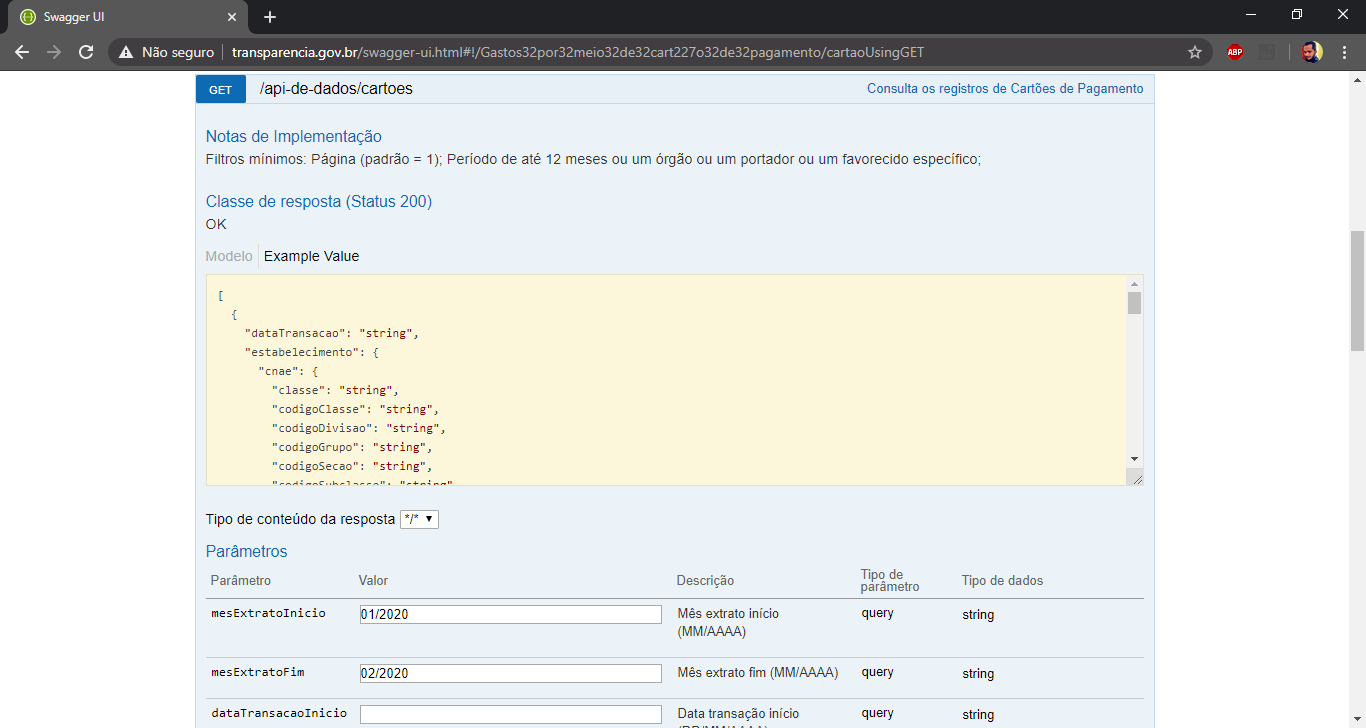

E aqui, o resultado: ele gera o endereço completo para a busca baseado nos valores preenchidos nos campos e mostra a resposta formatada.

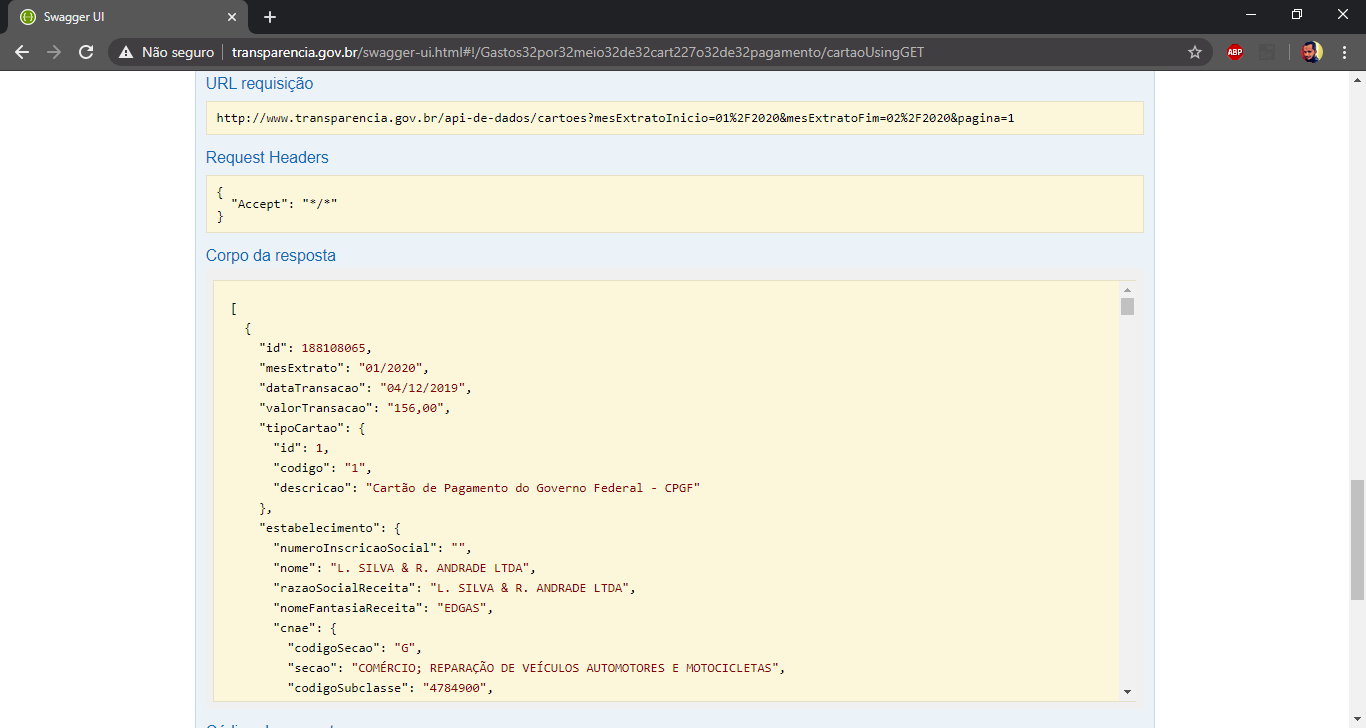

## Consumindo APIs em Python

As APIs são meios de nos conectarmos a recursos na internet. Portanto, já possuímos as ferramentas na mão desde os capítulos anteriores. Você irá construir a lógica para decidir o que você irá buscar/consultar, montará uma string seguindo o formato indicado pela documentação da API (como todos os exemplos deste capítulo). Em seguida você tratará a resposta de acordo:

- Se for JSON, utilize o método json da própria requests.
- Se for CSV, utilize o módulo CSV estudado anteriormente.
- Se for XML, podemos utilizar o módulo BeautifulSoup, que não será estudado aqui.
- Para outros formatos, provavelmente a solução mais fácil será baixar um módulo preparado  para lidar com eles.

**Descobrindo APIs**: tem boas ideias e gostaria de saber se existe uma boa API para ajudar? Confira alguns bons repositórios de API organizados por categoria:

https://github.com/n0shake/public-apis

https://github.com/public-apis/public-apis

https://any-api.com/

Sites de governos costumam ter uma grande riqueza de dados também. Segue abaixo algumas sugestões (oficiais ou mantidas por voluntários) com dados do Brasil como um todo. Experimente buscar por bases de dados de sua cidade ou estado!

http://www.transparencia.gov.br/swagger-ui.html

http://www.dados.gov.br/

https://brasil.io/home/

# Codigos da Aula

In [1]:
!pip install requests

In [3]:
import requests

In [4]:
url = 'https://api.exchangerate-api.com/v6/latest'

req = requests.get(url)
print(req.status_code) # codigo de status 200 = ok

200


In [5]:
dados = req.json()

print(dados) # base_code -> moeda padrão , rates taxa de conversão

{'result': 'success', 'provider': 'https://www.exchangerate-api.com', 'documentation': 'https://www.exchangerate-api.com/docs/free', 'WARNING_NEW_ENDPOINT': 'Swap *api.exchangerate-api.com* with *open.er-api.com* for better servers!', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'time_last_update_unix': 1626480152, 'time_last_update_utc': 'Sat, 17 Jul 2021 00:02:32 +0000', 'time_next_update_unix': 1626567902, 'time_next_update_utc': 'Sun, 18 Jul 2021 00:25:02 +0000', 'time_eol_unix': 0, 'base_code': 'USD', 'rates': {'USD': 1, 'AED': 3.67, 'AFN': 80.18, 'ALL': 103.69, 'AMD': 494.91, 'ANG': 1.79, 'AOA': 647.54, 'ARS': 96.25, 'AUD': 1.35, 'AWG': 1.79, 'AZN': 1.7, 'BAM': 1.65, 'BBD': 2, 'BDT': 84.81, 'BGN': 1.66, 'BHD': 0.376, 'BIF': 1970.43, 'BMD': 1, 'BND': 1.35, 'BOB': 6.89, 'BRL': 5.1, 'BSD': 1, 'BTN': 74.61, 'BWP': 11.01, 'BYN': 2.54, 'BZD': 2, 'CAD': 1.26, 'CDF': 1978.53, 'CHF': 0.919, 'CLP': 752.52, 'CNY': 6.47, 'COP': 3795.72, 'CRC': 619.32, 'CUC': 1, 'CUP': 25.75, 'CV

In [6]:
valor_reais = float(input('informe o valor em reais a ser convertido\n'))
cotacao = dados['rates']['BRL']
print(f'R${valor_reais} em dolar valem US$ {(valor_reais / cotacao):.2f}')

informe o valor em reais a ser convertido
100
R$100.0 em dolar valem US$ 19.61
